# IEOR 4650 - Business Analytics

## Assignment 3

### Team 29: Yufei Jin (yj2691) & Pierre Counathe (pc2977)

In [22]:
library(ggplot2)
library(glmnet)
library(MASS)
library(caret)
library(class)

# Problem 1

### Question a)

In [23]:
# Import data and set seed for repeatability
set.seed(4650)
orange_data <- read.csv("OrangeJuice.csv")
head(orange_data)
sum(is.na(orange_data))

,X,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff
,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24
2,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06
3,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40
4,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00
5,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00
6,6,CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30


[1] 0

In [24]:
split <- sample(c(rep(0, 0.5 * nrow(orange_data)), 
                  rep(1, 0.25 * nrow(orange_data)), 
                  rep(2, 0.25 * nrow(orange_data))))

train_set <- orange_data[split == 0, ]
validation_set <- orange_data[split == 1, ]
test_set <- orange_data[split == 2, ]     

In [25]:
summary(train_set)

       X            Purchase         WeekofPurchase     StoreID     
 Min.   :   1.0   Length:536         Min.   :227.0   Min.   :1.000  
 1st Qu.: 278.8   Class :character   1st Qu.:239.0   1st Qu.:2.000  
 Median : 549.5   Mode  :character   Median :256.5   Median :3.000  
 Mean   : 547.1                      Mean   :254.0   Mean   :4.013  
 3rd Qu.: 810.2                      3rd Qu.:267.0   3rd Qu.:7.000  
 Max.   :1070.0                      Max.   :278.0   Max.   :7.000  
    PriceCH         PriceMM          DiscCH            DiscMM     
 Min.   :1.690   Min.   :1.690   Min.   :0.00000   Min.   :0.000  
 1st Qu.:1.790   1st Qu.:1.990   1st Qu.:0.00000   1st Qu.:0.000  
 Median :1.860   Median :2.090   Median :0.00000   Median :0.000  
 Mean   :1.865   Mean   :2.079   Mean   :0.05401   Mean   :0.138  
 3rd Qu.:1.990   3rd Qu.:2.180   3rd Qu.:0.00000   3rd Qu.:0.300  
 Max.   :2.090   Max.   :2.290   Max.   :0.50000   Max.   :0.800  
   SpecialCH        SpecialMM         LoyalCH   

#### Covariance analysis

In [26]:
non_numerical_columns <- c("X", "Purchase")
cor(train_set[!(names(train_set) %in% non_numerical_columns)])

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff
WeekofPurchase,1.00000000,0.075895145,0.72772771,0.62056969,0.37019101,0.217898836,0.05430032,0.06150050,0.15856567,0.13556579,0.20825004,0.01828848
StoreID,0.07589514,1.000000000,-0.01682954,0.06675979,0.32000072,0.008418251,0.37227842,-0.15608507,0.23401598,0.02753165,-0.27442898,0.16907171
PriceCH,0.72772771,-0.016829542,1.00000000,0.62721464,0.14583830,0.093074190,-0.14024001,-0.02655727,0.03390598,0.24661025,0.58391912,-0.07380543
PriceMM,0.62056969,0.066759788,0.62721464,1.00000000,0.07160843,0.015956885,-0.06149618,-0.04711281,0.06650592,0.50732508,0.38254230,0.27559971
DiscCH,0.37019101,0.320000724,0.14583830,0.07160843,1.00000000,0.015316581,0.53220322,-0.05682903,0.13473325,0.02411274,-0.71797454,0.39743951
DiscMM,0.21789884,0.008418251,0.09307419,0.01595688,0.01531658,1.000000000,0.17288920,0.50647039,-0.02887638,-0.85354971,0.05291768,-0.82733311
SpecialCH,0.05430032,0.372278420,-0.14024001,-0.06149618,0.53220322,0.172889199,1.00000000,-0.15089296,0.12337308,-0.18105135,-0.53538980,0.10989197
SpecialMM,0.06150050,-0.156085071,-0.02655727,-0.04711281,-0.05682903,0.506470389,-0.15089296,1.00000000,-0.09860898,-0.46105828,0.02794758,-0.44656453
LoyalCH,0.15856567,0.234015985,0.03390598,0.06650592,0.13473325,-0.028876378,0.12337308,-0.09860898,1.00000000,0.05954228,-0.08670414,0.10105361
SalePriceMM,0.13556579,0.027531649,0.24661025,0.50732508,0.02411274,-0.853549715,-0.18105135,-0.46105828,0.05954228,1.00000000,0.15372641,0.85665791


There is no perfect covariance at first sight, but let's check the relation between Prices, SalePrices and Discounts.

[1] 1.509903e-14

[1] 9.547918e-15

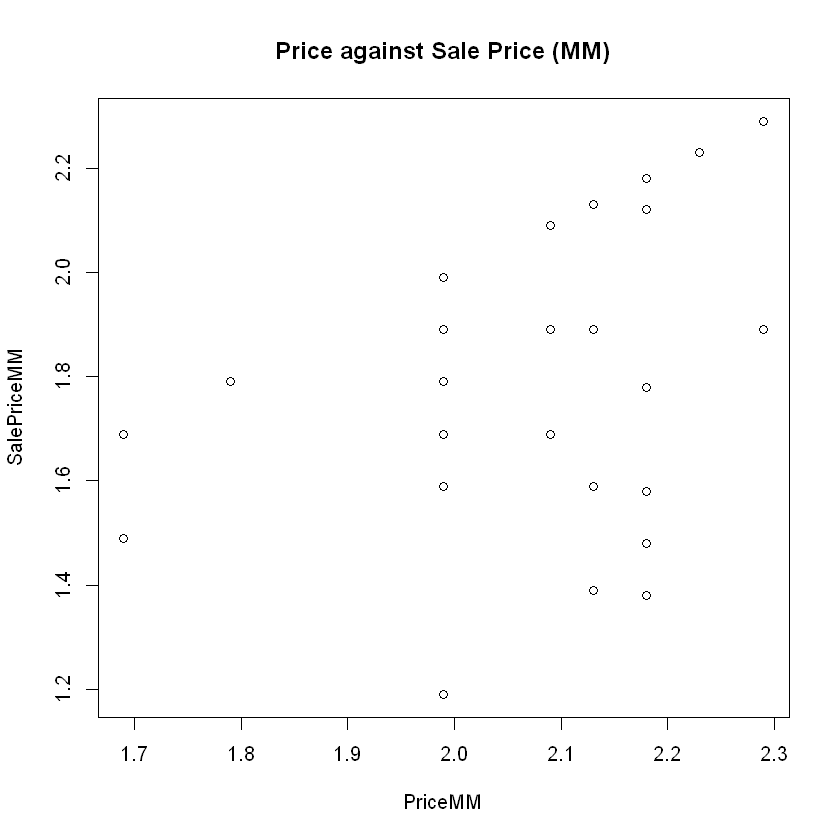

In [27]:
# We plot Price against SalePrice for MM
plot(train_set$PriceMM, train_set$SalePriceMM,
    xlab = "PriceMM", ylab = "SalePriceMM", 
    main = "Price against Sale Price (MM)")


# As values of SalePrice are under Price values, 
# we try to see if the SalePrice + Discount sums to Price
sum(abs(train_set$PriceMM - (train_set$SalePriceMM + train_set$DiscMM)))
sum(abs(train_set$PriceCH - (train_set$SalePriceCH + train_set$DiscCH)))

The difference between `train_set$PriceMM` and `train_set$SalePriceMM + train_set$DiscMM` is so small that we consider it to be the same (approximation errors).

- Qualitative variables are:
    - `Purchase` ( Although some methods could take care of it, it is better to be transformed to binary 0 / 1 )
    - `StoreID`
    - `SpecialMM` and `SpecialCH`

- Variables to be dropped are:
    - `PriceDiff` (difference of two other columns, introduces multicolinearity in the dataset)
    - `SalePriceCH` and `SalePriceMM` (or discount columns, for the same reason)
    - `X`, that is the index

- We keep `WeekOfPurchase` for now as continuous, it might have an effect on the model if there is a trend in the choice for CH or MM

In [28]:
# We do the trnasformation we just talked about on the whole dataset 
# and then split again

# Create factors for qualitative variables or non ordered quantitative variables
orange_data$Purchase <- factor(orange_data$Purchase)
orange_data$Purchase.MM <- as.integer(as.logical(orange_data$Purchase == 'MM'))
orange_data$SpecialCH <- factor(orange_data$SpecialCH)
orange_data$SpecialMM <- factor(orange_data$SpecialMM)
orange_data$StoreID <- factor(orange_data$StoreID)

# Drop irrelevant columns
to_drop <- c("X", "PriceDiff", "Purchase", "SalePriceCH", "SalePriceMM")
orange_data <- orange_data[!(names(orange_data) %in% to_drop)]

split2 <- sample(c(rep(0, 0.5 * nrow(orange_data)), 
                   rep(1, 0.25 * nrow(orange_data)), 
                   rep(2, 0.25 * nrow(orange_data))))

final_train_set <- orange_data[split2 == 0, ]
final_validation_set <- orange_data[split2 == 1, ]
final_test_set <- orange_data[split2 == 2, ]   

In [29]:
head(final_train_set)

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,Purchase.MM
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<int>
2,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,0
3,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,0
4,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1
7,232,7,1.69,1.99,0.00,0.4,1,1,0.972182,0
8,234,7,1.75,1.99,0.00,0.4,1,0,0.977746,0
16,278,7,2.06,2.13,0.00,0.0,0,0,0.795200,0


### Question b)

In [30]:
logit1 <- glm(Purchase.MM ~., data = final_train_set, family = "binomial")
summary(logit1)


Call:
glm(formula = Purchase.MM ~ ., family = "binomial", data = final_train_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8793  -0.5545  -0.2601   0.5669   2.7741  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     0.97576    2.64650   0.369 0.712354    
WeekofPurchase  0.01697    0.01556   1.091 0.275181    
StoreID2        0.51292    0.40179   1.277 0.201743    
StoreID3        0.50065    0.54789   0.914 0.360832    
StoreID4        0.27029    0.58106   0.465 0.641804    
StoreID7       -0.18345    0.40456  -0.453 0.650214    
PriceCH         3.48544    2.55390   1.365 0.172330    
PriceMM        -4.42241    1.29922  -3.404 0.000664 ***
DiscCH         -4.44460    1.45730  -3.050 0.002289 ** 
DiscMM          1.65330    0.74403   2.222 0.026278 *  
SpecialCH1      0.01574    0.47320   0.033 0.973469    
SpecialMM1      0.21249    0.37317   0.569 0.569068    
LoyalCH        -6.25335    0.58299 -10.726  < 2e-16 ***
---


- Two factors are highly significant: `PriceMM` (negative effect on probability of purchasing at MM, which seems to be relevant), `LoyalCH` (negative effect on probability of purchasing at MM, which seems to be relevant too)
- One factor is significant `DiscCH`, negative effect on probability of purchasing at MM, which is relevant
- One factor is a bit significant `DiscMM`, positive effect on probability of purchasing at MM, which is relevant
- The other factors in this model are not significant

### Question c)

In [31]:
y <- final_train_set$Purchase.MM
x <- data.matrix(final_train_set[,-10])

lmbda <- c(0.001, 0.01, 0.1, 1, 10, 100, 1000)
# alpha = 1 is lasso regularization

# we have to chose type.measure between "auc" and "class"
# we choose "class" for now, and will change the threshold if needed 
# in further exploration

cv.out <- cv.glmnet(x,y, alpha = 1, lambda = lmbda, type.measure = "class", 
                    nfolds = 5, family = "binomial")

bestlam <- cv.out$lambda.min
bestlam

# final model on training data
best.lasso <- glmnet(x,y, alpha = 1, lambda = bestlam, type.measure = "class",
                     family = "binomial")
coef(best.lasso)

[1] 0.001

10 x 1 sparse Matrix of class "dgCMatrix"
                         s0
(Intercept)     0.055351790
WeekofPurchase  0.007507834
StoreID        -0.109458712
PriceCH         4.985522948
PriceMM        -4.018996880
DiscCH         -4.323224722
DiscMM          1.510671551
SpecialCH       .          
SpecialMM       0.192670649
LoyalCH        -6.190131340

The best linear regression is obtained using $\lambda = 0.001$ and gives coefficients as can be seen above (shuts out 1 coefficient).

### Question d)

In [32]:
LDA <- lda(y ~ x)
train_predictions <- predict(LDA, final_train_set[,-10])
train_predictions <- as.integer(train_predictions$class) - 1 
# formating to compare to y
classification_error <- sum(abs(y - train_predictions))/length(y)
# Output a confusion matrix using caret package

confusionMatrix(factor(train_predictions), factor(y))
sprintf("The training classification error is: %s", classification_error)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 288  48
         1  42 157
                                          
               Accuracy : 0.8318          
                 95% CI : (0.7973, 0.8625)
    No Information Rate : 0.6168          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6421          
                                          
 Mcnemar's Test P-Value : 0.5982          
                                          
            Sensitivity : 0.8727          
            Specificity : 0.7659          
         Pos Pred Value : 0.8571          
         Neg Pred Value : 0.7889          
             Prevalence : 0.6168          
         Detection Rate : 0.5383          
   Detection Prevalence : 0.6280          
      Balanced Accuracy : 0.8193          
                                          
       'Positive' Class : 0               
                              

[1] "The training classification error is: 0.168224299065421"

### Question e)

In [33]:
# Here we use LOOCV(leave one out cross validation), 
# and try all values for k from 1 to 100 
# (we assume that afterwards the bias is too high)
# we need to scale the data for knn
x.knn <- scale(x, center = TRUE, scale = TRUE)
error <- 1
best.k <- 1
for (k in seq(1, 100, 1)){
    knn.cv.out <- knn.cv(x.knn,y, k = k)
    knn.cv.out <- as.integer(knn.cv.out) - 1
    current.error <- sum(abs(y - knn.cv.out))/length(y)
    if (current.error < error){
        error <- current.error
        best.k <- k
    }
}
sprintf("Best k is %s with error of %s on the training dataset", best.k, error)

[1] "Best k is 39 with error of 0.186915887850467 on the training dataset"

### Question f)

In [34]:
# Best logistic regression, fitted on training set, tested on validation set

#data
y <- final_train_set$Purchase.MM
x <- final_train_set[,-10]

val_y <- final_validation_set$Purchase.MM
val_x <- final_validation_set[,-10]

# formula
fmla <- paste("Purchase.MM ~", paste(names(final_train_set[, -10]), collapse = " + "))

#model
logit1 <- glm(fmla, data = final_train_set, family = "binomial")
#predictions
val_predictions <- predict(logit1, val_x, type = "response")
#error
logit_val_error <- sum(abs(val_y - val_predictions))/length(val_y)
sprintf("The logistic regression classification error on the validation set is : %s",
        logit_val_error)

[1] "The logistic regression classification error on the validation set is : 0.258858025474912"

In [35]:
# Best Logistic with LASSO regression, fitted on training set, tested on validation set

#data
y <- final_train_set$Purchase.MM
x <- data.matrix(final_train_set[,-10])

val_y <- final_validation_set$Purchase.MM
val_x <- data.matrix(final_validation_set[,-10])

#model
best.lasso <- glmnet(x,y, alpha = 1, lambda = bestlam)

#prediction
lasso_predictions <- predict(best.lasso, newx = val_x)

#error
lasso_val_error <- sum(abs(val_y - lasso_predictions))/length(val_y)
sprintf("The lasso regression classification error on the validation set is : %s", 
        lasso_val_error)

[1] "The lasso regression classification error on the validation set is : 0.287272788246781"

In [36]:
# LDA, fitted on training set, tested on validation set

#data
y <- final_train_set$Purchase.MM
x <- data.matrix(final_train_set[,-10])

val_y <- final_validation_set$Purchase.MM
val_x <- data.matrix(final_validation_set[,-10])

#model
LDA <- lda(y~x)

x <- val_x # trick to avoid an error due to the names of the variables

#prediction
lda_predictions <- predict(LDA, data.frame(x))
lda_predictions <- as.integer(lda_predictions$class) - 1 
# formating to compare to val_y
lda_val_error <- sum(abs(val_y - lda_predictions))/length(val_y)
sprintf("The LDA classification error on the validation set is : %s", lda_val_error)

[1] "The LDA classification error on the validation set is : 0.191011235955056"

In [37]:
# Best KNN (k = 39) on training set, tested on validation set

#data
y <- final_train_set$Purchase.MM
x <- scale(data.matrix(final_train_set[,-10]))

val_y <- final_validation_set$Purchase.MM
val_x <- scale(data.matrix(final_validation_set[,-10]))

#model and prediction
knn_predictions <- knn(x, val_x, y, k = best.k)
knn_predictions <- as.integer(knn_predictions) - 1
#error
knn_val_error <- sum(abs(val_y - knn_predictions))/length(val_y)
sprintf("The KNN classification error on the validation set is : %s", knn_val_error)

[1] "The KNN classification error on the validation set is : 0.213483146067416"

Based on the validation set classification errors, the ranking of the models is the following:
1. LDA
2. KNN
3. Logit
4. Logit with LASSO

### Question g)

In [38]:
# build a dataframe that has train and validation data
final_train_and_validation_set <- rbind(final_train_set, final_validation_set)
# check that everything went well
length(final_train_set[, 1])
length(final_validation_set[, 1])
length(final_train_and_validation_set[, 1])
sum(is.na(final_train_and_validation_set))

[1] 535

[1] 267

[1] 802

[1] 0

In [39]:
# LDA, fitted on training + validation set, tested on test set

#data
y <- final_train_and_validation_set$Purchase.MM
x <- data.matrix(final_train_and_validation_set[,-10])

test_y <- final_test_set$Purchase.MM
test_x <- data.matrix(final_test_set[,-10])

#model
final_LDA <- lda(y~x)

x <- test_x # trick to avoid an error due to the names of the variables

#prediction
lda_test_predictions <- predict(final_LDA, data.frame(x))
lda_test_predictions <- as.integer(lda_test_predictions$class) -1 
# formating to compare to test_y

lda_test_error <- sum(abs(test_y - lda_test_predictions))/length(test_y)
sprintf("The LDA classification error on the test set is : %s", lda_test_error)

[1] "The LDA classification error on the test set is : 0.138059701492537"

### Question h)

In [40]:
# Trying to predict CH customers (label = 0 thus negative)
# a True Negative (predict = CH, and CH customer) leads to $3.50 profit
# a False Negative (Predict = CH, and MM customer) is a waste of $0.50 

# LDA, fitted on training + validation set, tested on test set

#data
y <- final_train_and_validation_set$Purchase.MM
x <- data.matrix(final_train_and_validation_set[,-10])

test_y <- final_test_set$Purchase.MM
test_x <- data.matrix(final_test_set[,-10])

#model
final_LDA <- lda(y~x)

x <- test_x # trick to avoid an error due to the names of the variables

#prediction
lda_test_predictions <- predict(final_LDA, data.frame(x))
MM.prob <- lda_test_predictions$posterior[, 2]

step <- 0.005
thresholds <- seq(0, 1, step)
FP_points <- seq(0, 1, step)
TP_points <- seq(0, 1, step)
possible_profits <- seq(0, 1, step)

i <- 0

for (threshold in thresholds){
    lda_test_predictions <- predict(final_LDA, data.frame(x))
    MM.prob <- lda_test_predictions$posterior[, 2]
    lda_test_predictions <- as.integer(MM.prob > threshold)
    # create a vector where
    # -0.5 is False Negative
    # 0 is True Negative
    # 0.5 is True Positive
    # 1 False Positive
    classification_vector <- lda_test_predictions - 0.5*test_y
    FN <- sum(classification_vector == -0.5)
    TN <- sum(classification_vector == 0)
    TP <- sum(classification_vector == 0.5)
    FP <- sum(classification_vector == 1)
    
    profit <- 3.50*TN - 0.5*FN

    FP_points[i] <- FP/(FP + TN)
    TP_points[i] <- TP/(TP + FN)
    possible_profits[i] <- profit
    i <- i + 1
}

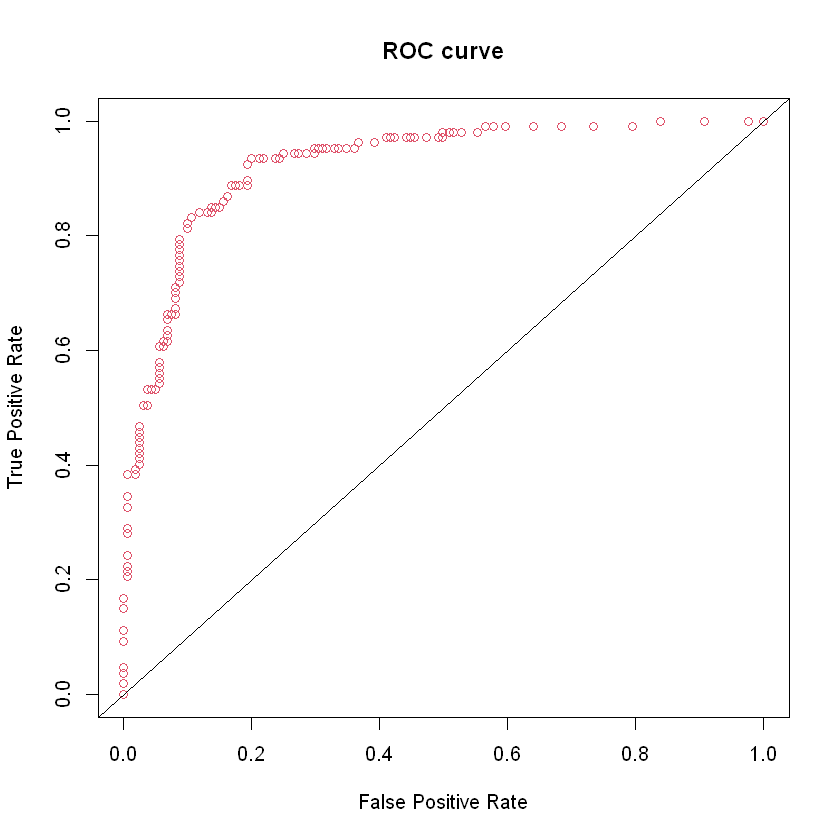

In [41]:
plot(FP_points, TP_points, 
    xlab = "False Positive Rate", ylab = "True Positive Rate", 
    main = "ROC curve", col = 2)
abline(0, 1, col = 1)

[1] "The best threshold is 0.9 and gives a max payoff of 527"

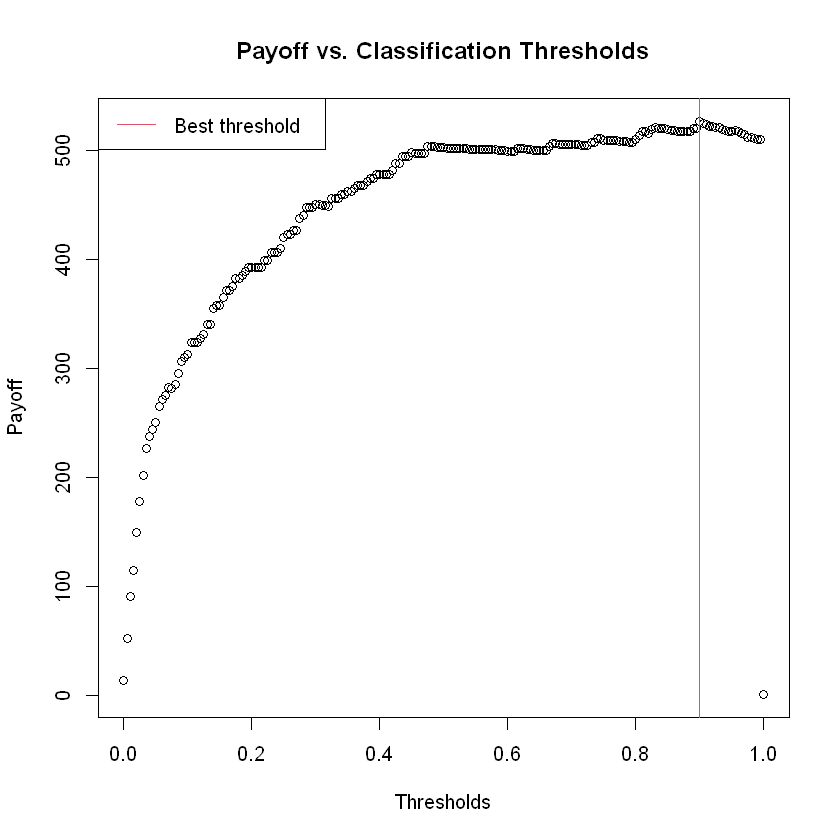

In [42]:
plot(thresholds, possible_profits, 
    xlab = "Thresholds", ylab = "Payoff", 
    main = "Payoff vs. Classification Thresholds")
best.threshold <- thresholds[which.max(possible_profits)]
max.profit <- max(possible_profits)
abline(v = best.threshold, col = 2)
legend("topleft", c("Best threshold"), lty = c(1), col = c(2))
sprintf("The best threshold is %s and gives a max payoff of %s", best.threshold,
        max.profit)

# Problem 2

There are multiple ways of building recommendation systems using logistic regression and shrinkage. For all of them we imagine that we have our dataset with the music represented in features with weights from 1 to 5. 
- **The personnal recommendation system** : Let's suppose that a user has liked 1000 songs, and disliked 1000. We can join our previous dataset to this list of liked songs in order to build a logistic regression / lasso model. This model will predict the probability that this particular user likes another song that is not liked yet
- **The grouped recommendation system** : The problem of this previous method is that it requires every user to like/dislike a lot of songs (build the target column of the dataset in fact). Another way could be to clusterize listeners based on their tastes and then use the information on the whole cluster as a target variable (if in the cluster of people there are more likes than dislikes for a particular song, then we assign to this song a 1; and the opposite way). But this assumes that we are able to cluster people (and algorithms are close to KNN, so we might know KNN as well)


**Cons of logistic regression**
- In either case, as Logistic Regression is supervised learning, we need to create a target variable. This can be liked songs as mentionned, or maybe a binary variable derived from the number of time someone has listened to a song, etc.
- For each user or group of user we need to create a different model
- The boundaries for this method are linear, but we are not sure that it reflects true musical tastes
- Logistics regression is based on the assumption of linearity between the logit of the outcome and the independent variables which might not be true in reality.

**Pros of logistic regression**
- Easy to use and efficient to train
- Good first model
- Gives statistical significance of variables
- It can easily extend to multiple classes and a natural probabilistic view of class predictions
- It makes no assumptions about distribution of classes in feature space